<a href="https://colab.research.google.com/github/AngTorresv/Machine_Learning/blob/main/Modelo_Prediccion_precios/Modelo_prediccion_precio_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import  matplotlib.pyplot as plt
import  numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import cufflinks as cf
from IPython.display import display,HTML 
cf.set_config_file(sharing='public',theme='space',offline=True)
%matplotlib inline 
df_train = pd.read_csv('/content/drive/MyDrive/train-matriz de correlacion.csv')

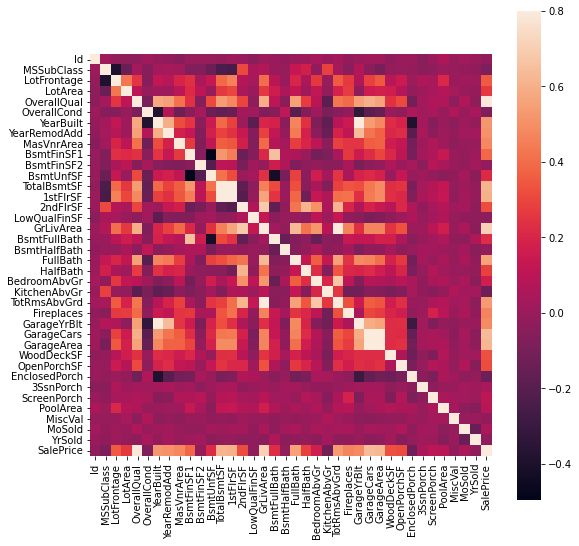

In [ ]:
#mariz de correlacion en la cual se puede ver la fuerza de  la correlacion lienal entre las variables 
corrmat = df_train.corr()
f ,ax = plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8, square=True)
plt.show()

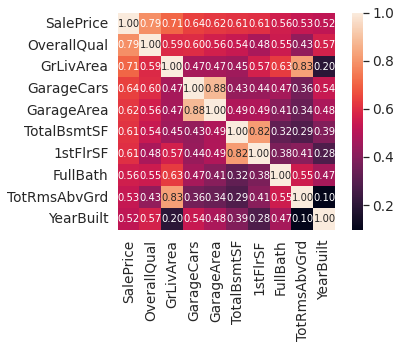

In [ ]:
#elegiremos las 7 variables mas correlacionadas para nuestro analisis
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(
    cm , cbar= True, annot= True, square = True, fmt=".2f", annot_kws={"size":10,},
    yticklabels=cols.values, xticklabels=cols.values)

In [ ]:
df = df_train[['SalePrice','OverallQual','GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt']]
var = df_train['SalePrice']

df

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt
0,208500,7,1710,548,856,856,2003
1,181500,6,1262,460,1262,1262,1976
2,223500,7,1786,608,920,920,2001
3,140000,7,1717,642,756,961,1915
4,250000,8,2198,836,1145,1145,2000
...,...,...,...,...,...,...,...
1455,175000,6,1647,460,953,953,1999
1456,210000,6,2073,500,1542,2073,1978
1457,266500,7,2340,252,1152,1188,1941
1458,142125,5,1078,240,1078,1078,1950


vemos el nivel de correlacion lineal con las variables no categoricas

0.5021486502718042


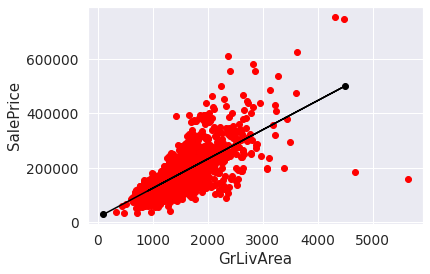

In [ ]:
varlife = df['GrLivArea']
data=pd.concat([var,varlife],axis=1)
from sklearn import linear_model
from sklearn.metrics import r2_score
regrecion = linear_model.LinearRegression()
GvLivArea = varlife.values.reshape(-1,1)

model = regrecion.fit(GvLivArea,var)
entrada = [[2000],[1078],[913],[4500],[100]]
print(r2_score(var, model.predict(GvLivArea)))
plt.scatter(entrada,model.predict(entrada),color='black')
plt.plot(entrada,model.predict(entrada),color='black')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(x = varlife ,y = var , color='red')
plt.show()

0.37648109325168655


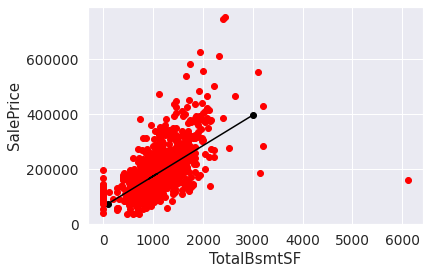

In [ ]:
varT = df_train['TotalBsmtSF']
data = pd.concat([var,varlife], axis=1)
regrecionn = linear_model.LinearRegression()
TotalBsmtSF = varT.values.reshape(-1,1)

modell = regrecion.fit(TotalBsmtSF,var)
entradaa = [[100],[1078],[913],[3000]]
print(r2_score(var, model.predict(TotalBsmtSF)))
plt.scatter(entradaa,modell.predict(entradaa),color='black')
plt.plot(entradaa,modell.predict(entradaa),color='black')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

plt.scatter(x = varT ,y = var , color='red')
plt.show()

0.388666759031819


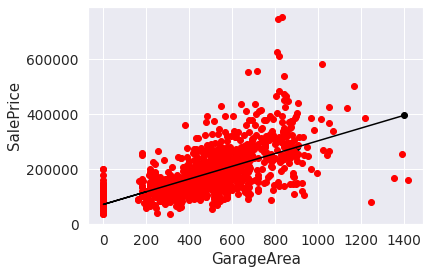

In [ ]:
varG = df_train['GarageArea']
data = pd.concat([var,varG], axis=1)
regrecionn = linear_model.LinearRegression()
GarageArea = varG.values.reshape(-1,1)

modelll = regrecion.fit(GarageArea,var)
entradaaa = [[200],[0],[500],[900],[1402]]
print(r2_score(var, model.predict(GarageArea)))
plt.scatter(entradaaa,modelll.predict(entradaaa),color='black')
plt.plot(entradaaa,modelll.predict(entradaaa),color='black')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.scatter(x = varG ,y = var , color='red')
plt.show()

0.36705686969596585


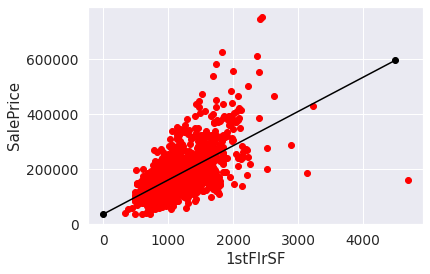

In [ ]:
var1 = df_train['1stFlrSF']
data = pd.concat([var,var1], axis=1)
regrecionnnn = linear_model.LinearRegression()
stFlrSF = var1.values.reshape(-1,1)

modellll = regrecion.fit(stFlrSF,var)
entradaaaa = [[0],[500],[900],[4500]]
print(r2_score(var, model.predict(stFlrSF)))
plt.scatter(entradaaaa,modellll.predict(entradaaaa),color='black')
plt.plot(entradaaaa,modellll.predict(entradaaaa),color='black')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.scatter(x = var1 ,y = var , color='red')
plt.show()

Datos Categoricos


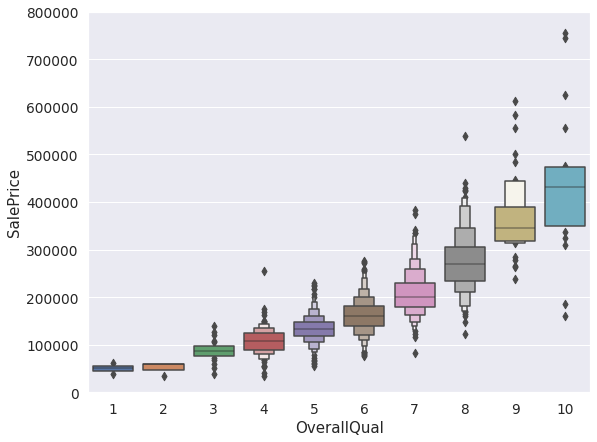

In [ ]:
varo = 'OverallQual'

data = pd.concat([df_train['SalePrice'],df_train[varo]], axis=1)
f , ax  = plt.subplots(figsize=(9,7))
fig = sns.boxenplot(x=varo, y='SalePrice',data = data)
fig.axis(ymin=0,ymax=800000)
plt.show()

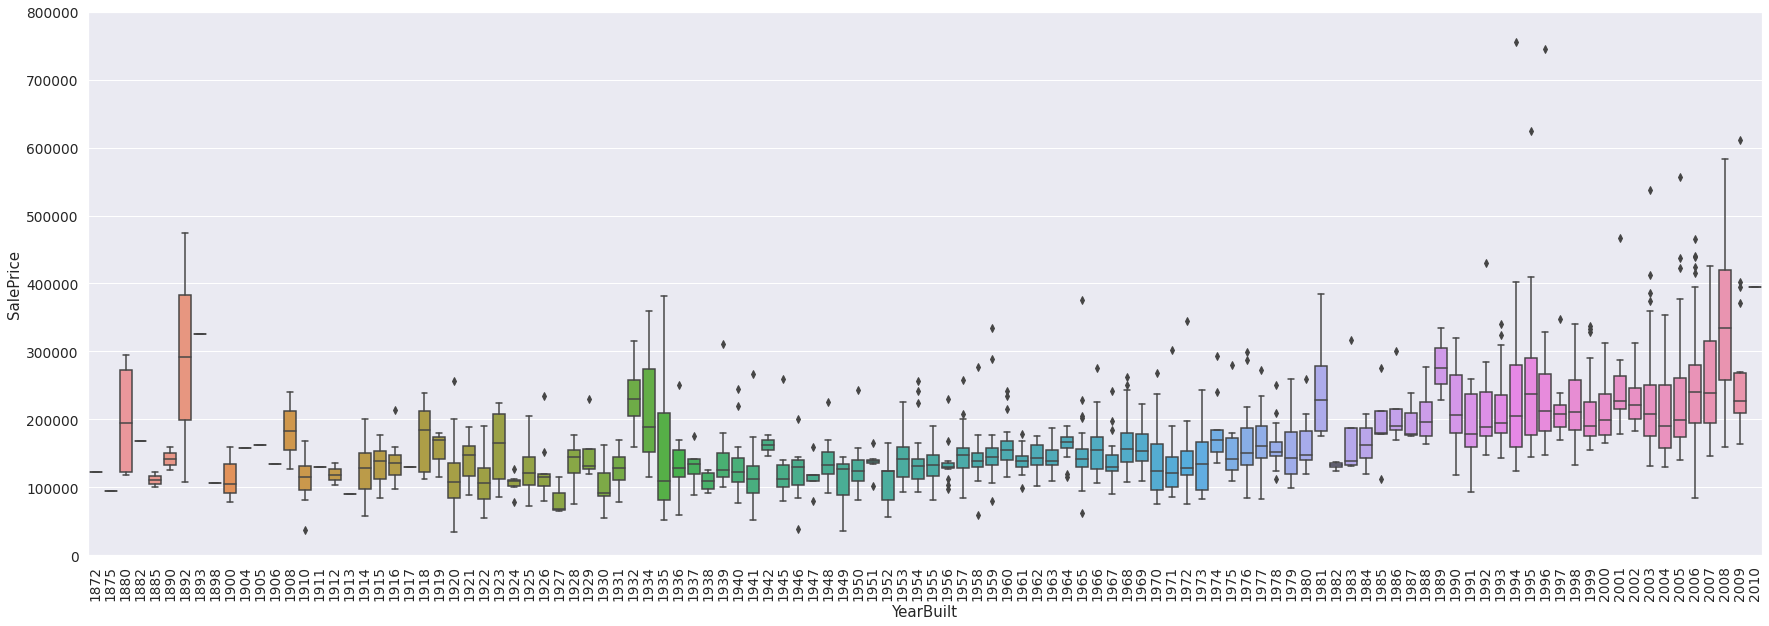

In [ ]:
var='YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
f ,ax = plt.subplots(figsize=(30,10)) 
fig =  sns.boxplot(x=var, y='SalePrice', data = data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)
plt.show()

# CLOSEST NEIGHBORS K=5 vs Red Neuronal
## Divicion de los datos para entrenar y calificar el modelo

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

df = df_train[['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','SalePrice']]
Xscaler = preprocessing.RobustScaler()
Yscaler = preprocessing.RobustScaler()
train, test = train_test_split(df,test_size=0.33, random_state=4)
train_x,train_y = df_train[['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF']], df_train['SalePrice']
test_x,test_y = df_train[['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF']], df_train['SalePrice']

train_x = Xscaler.fit_transform(train_x)
test_x = Xscaler.fit_transform(test_x)
train_y = Yscaler.fit_transform(train_y.values.reshape(-1,1))
test_y = Yscaler.fit_transform(test_y.values.reshape(-1,1))

CLOSEST NEIGHBORS K=5


In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(train_x,train_y)

KNeighborsRegressor()

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(test_y,knn.predict(test_x)))
print(mean_absolute_error(test_y,knn.predict(test_x)))

0.17716124767444996
0.26499615492779793


In [ ]:
num1 = Xscaler.fit_transform([[2000],[850],[1200],[1100]]) #price 250000,  2198	836	1145	1145
print(Yscaler.inverse_transform(knn.predict(num1.T)))
num2 = Xscaler.fit_transform([[1000],[250],[1100],[2000]]) #price 142125,	1078	240	1078	1950
print(Yscaler.inverse_transform(knn.predict(num2.T)))

[[237980.]]
[[150660.]]


Red Neuronal

In [ ]:
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers

In [ ]:
nn = kr.Sequential([layers.Dense(8, activation='relu',input_shape=[len(train_x.T)]),
                       layers.Dense(8, activation='relu'),
                       layers.Dense(1, activation='sigmoid')
                       ])
optimizer = kr.optimizers.SGD(0.01)

nn.compile(loss= 'mse' , optimizer=optimizer, metrics=['acc'])
nn.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 8)                 40        
                                                                 
 dense_69 (Dense)            (None, 8)                 72        
                                                                 
 dense_70 (Dense)            (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from timeit import default_timer
print('comienza el entrenamiento')
inicio = default_timer()
nn.fit(train_x,train_y,epochs=500, verbose=False)
fin = default_timer()
print('entrenamiento terminado')
print(fin-inicio)


comienza el entrenamiento
entrenamiento terminado
26.30504486999962


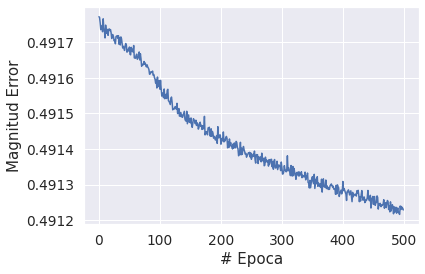

In [ ]:
plt.xlabel('# Epoca')
plt.ylabel('Magnitud Error')
plt.plot(nn.fit(train_x,train_y,epochs=500, verbose=False).history['loss'])
plt.show()

In [ ]:
print(mean_squared_error(test_y,nn.predict(test_x)))
print(mean_absolute_error(test_y,nn.predict(test_x)))

0.49113929320017663
0.4767204454489209


In [ ]:
num1 = Xscaler.fit_transform([[2000],[850],[1200],[1100]]) #price 250000,  2198	836	1145	1145
print(Yscaler.inverse_transform(nn.predict(num1.T)))
num2 = Xscaler.fit_transform([[1000],[250],[1100],[2000]]) #price 142125,	1078	240	1078	1950
print(Yscaler.inverse_transform(nn.predict(num2.T)))

[[243655.75]]
[[163010.12]]


Al parecer el primer modelo fue mas eficiente que la red neuronal 